In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Load dataset and diplay its 3 top-most data
urine = pd.read_csv('/content/drive/MyDrive/Data Journey/Datasets/Urinalysis Tests (Apr 2020 - Jan 2023).csv')
urine.head(3)

,Unnamed: 0,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
0,0,76.0,FEMALE,LIGHT YELLOW,CLEAR,NEGATIVE,NEGATIVE,5.0,1.01,1-3,0-2,OCCASIONAL,RARE,NONE SEEN,OCCASIONAL,NEGATIVE
1,1,9.0,MALE,DARK YELLOW,SLIGHTLY HAZY,NEGATIVE,1+,5.0,1.03,1-3,0-2,RARE,FEW,FEW,MODERATE,NEGATIVE
2,2,12.0,MALE,LIGHT YELLOW,SLIGHTLY HAZY,NEGATIVE,TRACE,5.0,1.03,0-3,0-2,RARE,FEW,MODERATE,RARE,NEGATIVE


In [ ]:
#Remove 'Unnamed: 0' column and display each column name and type
urine = urine.drop('Unnamed: 0', axis=1)
urine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1436 non-null   float64
 1   Gender            1436 non-null   object 
 2   Color             1435 non-null   object 
 3   Transparency      1436 non-null   object 
 4   Glucose           1436 non-null   object 
 5   Protein           1436 non-null   object 
 6   pH                1436 non-null   float64
 7   Specific Gravity  1436 non-null   float64
 8   WBC               1436 non-null   object 
 9   RBC               1436 non-null   object 
 10  Epithelial Cells  1436 non-null   object 
 11  Mucous Threads    1436 non-null   object 
 12  Amorphous Urates  1436 non-null   object 
 13  Bacteria          1436 non-null   object 
 14  Diagnosis         1436 non-null   object 
dtypes: float64(3), object(12)
memory usage: 168.4+ KB


In [ ]:
#Check whether there is null values or not
urine.isnull(). sum()

Age                 0
Gender              0
Color               1
Transparency        0
Glucose             0
Protein             0
pH                  0
Specific Gravity    0
WBC                 0
RBC                 0
Epithelial Cells    0
Mucous Threads      0
Amorphous Urates    0
Bacteria            0
Diagnosis           0
dtype: int64

In [ ]:
#Locate the null value location
urine.loc[urine.isnull().any(axis=1)]

,Age,Gender,Color,Transparency,Glucose,Protein,pH,Specific Gravity,WBC,RBC,Epithelial Cells,Mucous Threads,Amorphous Urates,Bacteria,Diagnosis
1353,18.0,FEMALE,NaN,CLEAR,NEGATIVE,TRACE,6.0,1.02,1-2,0-2,RARE,MODERATE,NONE SEEN,RARE,NEGATIVE


In [ ]:
#Remove the null value and check for the update
urine = urine.dropna()
urine.isnull().sum()

Age                 0
Gender              0
Color               0
Transparency        0
Glucose             0
Protein             0
pH                  0
Specific Gravity    0
WBC                 0
RBC                 0
Epithelial Cells    0
Mucous Threads      0
Amorphous Urates    0
Bacteria            0
Diagnosis           0
dtype: int64

In [ ]:
#Display the numerical values for urine dataset
urine_num = urine.select_dtypes(include=['int','float']).columns.to_list()
print(f'Total numerical values: {len(urine_num)}')

Total numerical values: 3


In [ ]:
#Display all categorical values
urine_cat = urine.select_dtypes(include=['object', 'category']).columns.to_list()

print(f'Total categorical values: {len(urine_cat)}')

for column in urine_cat:
  unique_values = urine[column].unique()
  print(f" + Unique values for '{column}':{unique_values}")

Total categorical values: 12
 + Unique values for 'Gender':['FEMALE' 'MALE']
 + Unique values for 'Color':['LIGHT YELLOW' 'DARK YELLOW' 'BROWN' 'YELLOW' 'AMBER' 'STRAW' 'RED'
 'REDDISH' 'REDDISH YELLOW' 'LIGHT RED']
 + Unique values for 'Transparency':['CLEAR' 'SLIGHTLY HAZY' 'CLOUDY' 'HAZY' 'TURBID']
 + Unique values for 'Glucose':['NEGATIVE' '3+' '1+' 'TRACE' '4+' '2+']
 + Unique values for 'Protein':['NEGATIVE' '1+' 'TRACE' '2+' '3+']
 + Unique values for 'WBC':['1-3' '0-3' '5-8' '1-4' '3-5' '70-75' '0-2' '1-2' '2-4' '6-8' '8-10'
 '10-12' '0-1' '4-6' '20-25' '25-30' '18-25' '3-6' 'LOADED' '28-30' '5-7'
 '12-15' '15-17' '30-35' '8-12' '2-3' '35-40' '50-55' '11-15' '48-55'
 '45-50' '12-14' '14-16' '17-20' '55-58' '9-11' '>50' '15-20' '20-22'
 '18-20' '7-9' 'TNTC' '2-5' '34-36' '30-32' '23-25' '5-10' '9-15' '13-15'
 '4-8' '11-14' '10-16' '7-15' '7-8' '0-4' '15-22' '15-21' '>100' '7-10'
 '15-28' '1-5' '4-5' '2-7' '3-7' '10-15' '4-7' '79-85' '28-35' '3-10'
 '5-6' '3-4' '15-18' '4-10' '10

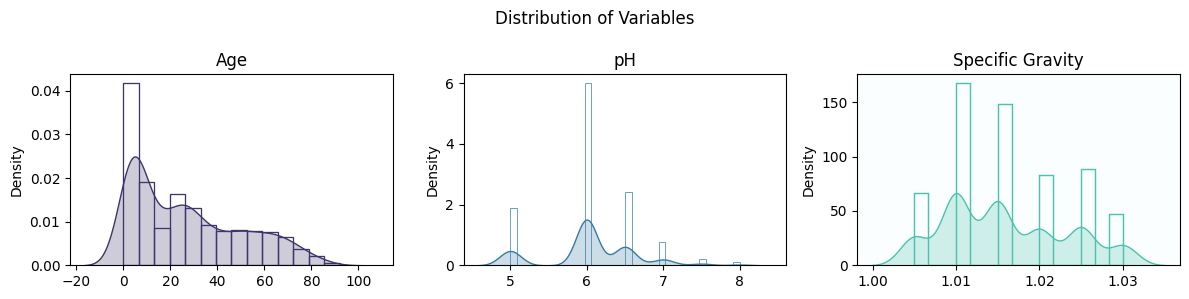

In [ ]:
#Distribution variables for each numerical value
colors = sns.color_palette(palette = 'mako', n_colors = len(urine_num))

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12,3))
axs = axs.flat

for i, num_feat in enumerate(urine_num):
  sns.kdeplot(urine, x = num_feat, fill = True, color = colors[i], ax = axs[i])
  sns.histplot(urine, x = num_feat, stat = 'density', fill = False, color = colors[i], ax = axs[i])
  axs[i].set_title(num_feat) #Set title for each graph
  axs[i].set_xlabel('') #Hide the bottom label of each graph
  fig.suptitle('Distribution of Variables')
  fig.tight_layout() #Set the padding

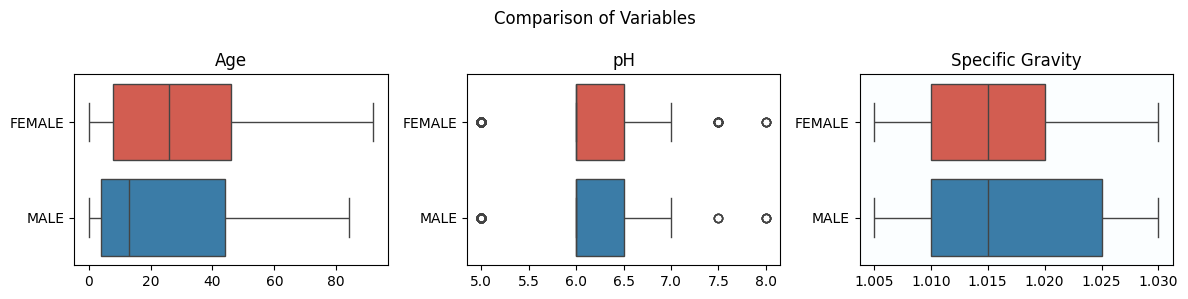

In [ ]:
#Distribution variables for each numerical value
gender_colors = {'FEMALE' : '#e74c3c', 'MALE' : '#2980b9'}

fig, axs = plt.subplots(nrows = 1, ncols = 3, figsize = (12,3))
axs = axs.flat

for i, num_feat in enumerate(urine_num):
  sns.boxplot(urine, x = num_feat, y = 'Gender', palette=gender_colors, hue = 'Gender', ax = axs[i])
  axs[i].set_title(num_feat) #Set title for each graph
  axs[i].set_xlabel('') #Hide the bottom label of each graph
  axs[i].set_ylabel('')
fig.suptitle('Comparison of Variables')
fig.tight_layout() #Set the padding
plt.show()

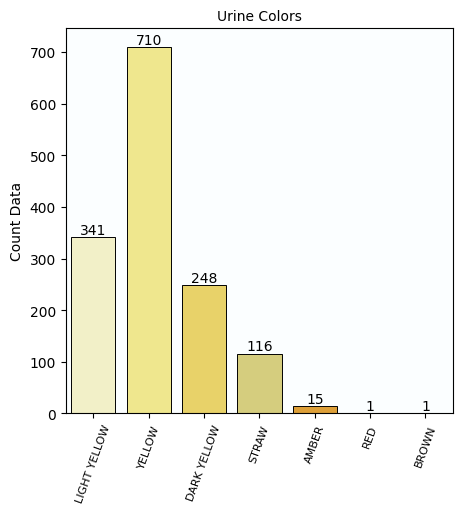

In [ ]:
color_order = ['LIGHT YELLOW', 'YELLOW', 'DARK YELLOW', 'STRAW', 'AMBER', 'RED', 'BROWN']

urine_colors = {
    'LIGHT YELLOW' : '#F9F6C1',
    'YELLOW' : '#FFF47E',
    'DARK YELLOW' : '#FDE054',
    'AMBER' : '#F9A61C',
    'BROWN' : '#E49E56',
    'STRAW' : '#E4D96F',
    'RED' : '#E49E56',
    'REDDISH' : '#EC9077',
    'REDDISH YELLOW' : '#9A5619',
    'LIGHT RED' : '#C27A85'
}

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(urine, x = urine_cat[1],
                   order = color_order,
                   palette = urine_colors,
                   hue=urine_cat[1],
                   edgecolor='black',
                   linewidth=0.7)
ax.set_title('Urine Colors', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Count Data')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=70)
for bars in ax.containers:
  ax.bar_label(bars)

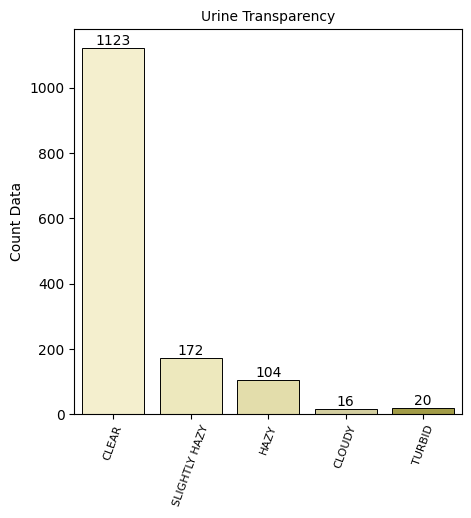

In [ ]:
trans_order = ['CLEAR', 'SLIGHTLY HAZY', 'HAZY', 'CLOUDY', 'TURBID']

urine_trans = {
    'CLEAR' : '#FAF4C8',
    'SLIGHTLY HAZY' : '#F5EEB5',
    'CLOUDY' : '#DBD598',
    'HAZY' : '#EDE4A1',
    'TURBID' : '#B1A938'
}

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(urine, x = urine_cat[2],
                   order = trans_order,
                   palette = urine_trans,
                   hue=urine_cat[2],
                   edgecolor='black',
                   linewidth=0.7)
ax.set_title('Urine Transparency', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Count Data')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=70)
for bars in ax.containers:
  ax.bar_label(bars)

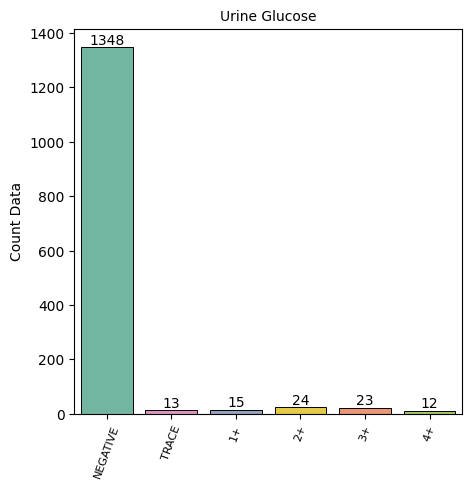

In [ ]:
glucose_order = ['NEGATIVE', 'TRACE', '1+', '2+', '3+', '4+']

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(urine, x = urine_cat[3],
                   order=glucose_order,
                   palette = 'Set2',
                   hue=urine_cat[3],
                   edgecolor='black',
                   linewidth=0.7)
ax.set_title('Urine Glucose', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Count Data')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=70)
for bars in ax.containers:
  ax.bar_label(bars)

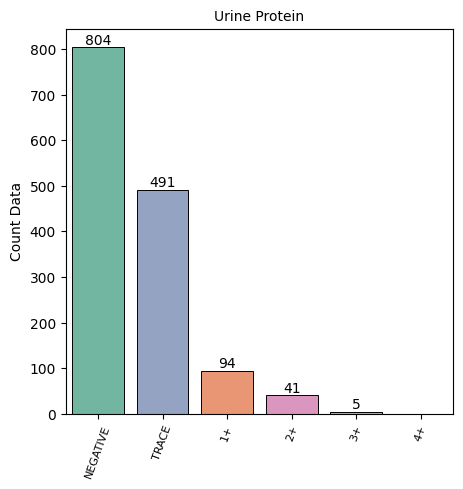

In [ ]:
protein_order = ['NEGATIVE', 'TRACE', '1+', '2+', '3+', '4+']

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(urine, x = urine_cat[4],
                   palette = 'Set2',
                   order = protein_order,
                   hue=urine_cat[4],
                   edgecolor='black',
                   linewidth=0.7)
ax.set_title('Urine Protein', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Count Data')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=70)
for bars in ax.containers:
  ax.bar_label(bars)

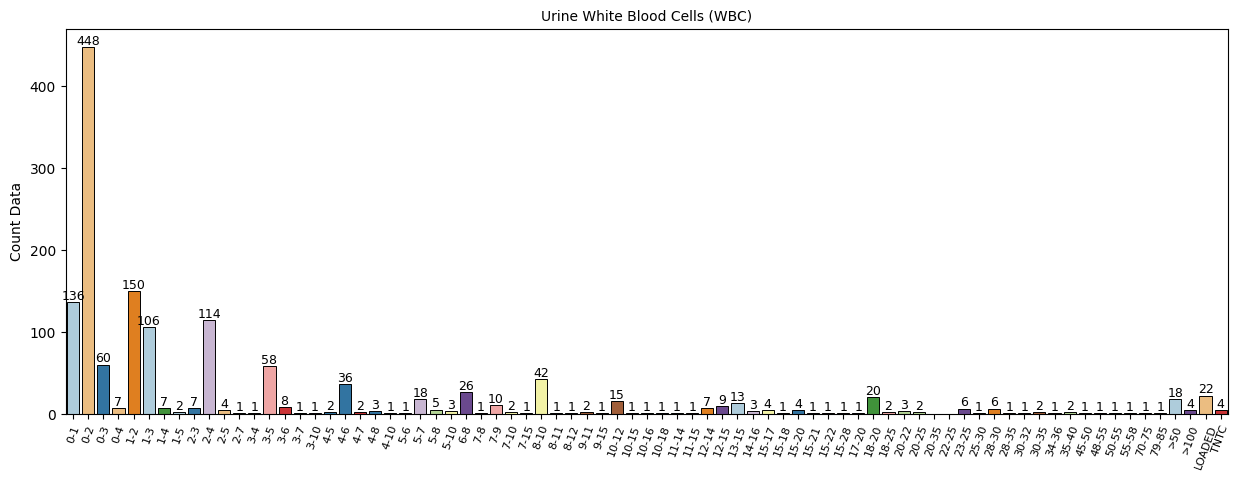

In [ ]:
wbc_order = ['0-1', '0-2', '0-3', '0-4', '1-2', '1-3', '1-4', '1-5', '2-3', '2-4', '2-5', '2-7', '3-4', '3-5', '3-6', '3-7', '3-10', '4-5', '4-6',
             '4-7', '4-8', '4-10', '5-6', '5-7', '5-8', '5-10', '6-8', '7-8', '7-9', '7-10', '7-15', '8-10', '8-11', '8-12', '9-11', '9-15', '10-12',
             '10-15', '10-16', '10-18', '11-14', '11-15', '12-14', '12-15', '12-15', '13-15', '14-16', '15-17', '15-18', '15-20', '15-21', '15-22',
             '15-28', '17-20', '18-20', '18-25', '20-22', '20-25', '20-35', '22-25', '23-25', '25-30', '28-30', '28-35', '30-32', '30-35', '34-36',
             '35-40', '45-50', '48-55', '50-55', '55-58', '70-75', '79-85', '>50', '>100', 'LOADED','TNTC'
] #TNTC = Too Numerous Too Count

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(urine, x = urine_cat[5],
                   palette = 'Paired',
                   order = wbc_order,
                   hue=urine_cat[5],
                   edgecolor='black',
                   linewidth=0.7)
ax.set_title('Urine White Blood Cells (WBC)', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Count Data')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=70)
for bars in ax.containers:
  ax.bar_label(bars, fontsize=9)

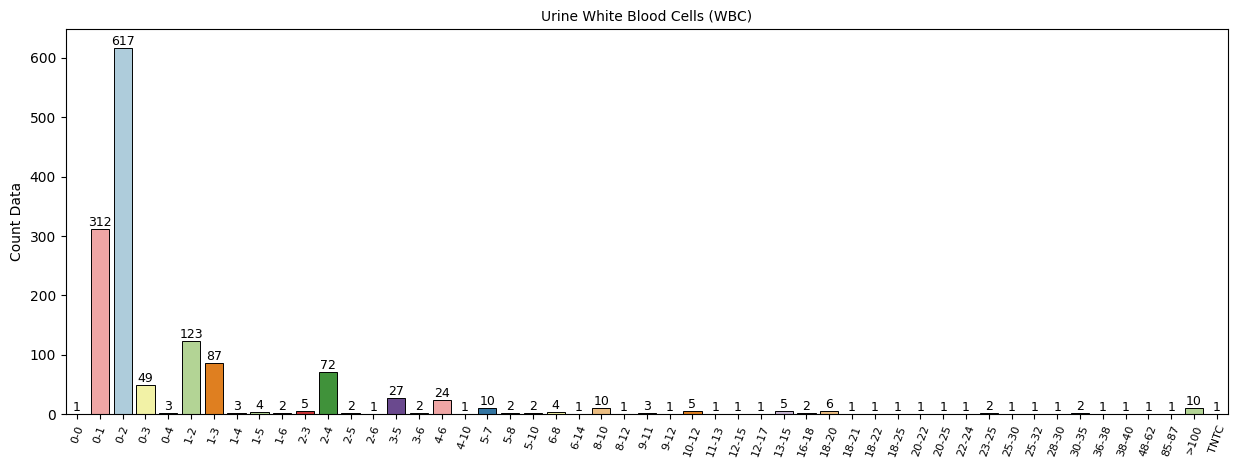

In [ ]:
rbc_order = ['0-0', '0-1', '0-1', '0-2', '0-3', '0-4', '1-2', '1-2', '1-3', '1-4', '1-5', '1-6', '2-3', '2-4', '2-5', '2-6', '3-5',
             '3-6', '4-6', '4-10', '5-7', '5-8', '5-8', '5-10', '6-8', '6-14', '8-10', '8-12', '9-11', '9-12', '10-12', '11-13', '12-15',
             '12-17', '13-15', '16-18', '18-20', '18-21', '18-22', '18-25', '20-22', '20-25', '20-25', '22-24', '23-25', '25-30', '25-32',
             '28-30', '30-35', '36-38', '38-40', '48-62', '85-87', '>100', 'TNTC'
] #TNTC = Too Numerous Too Count

fig, ax = plt.subplots(figsize=(15,5))
ax = sns.countplot(urine, x = urine_cat[6],
                   palette = 'Paired',
                   order = rbc_order,
                   hue=urine_cat[6],
                   edgecolor='black',
                   linewidth=0.7)
ax.set_title('Urine White Blood Cells (WBC)', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Count Data')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=70)
for bars in ax.containers:
  ax.bar_label(bars, fontsize=9)

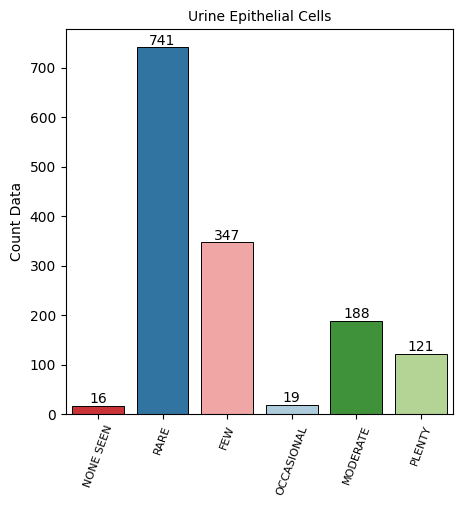

In [ ]:
epitel_order = ['NONE SEEN', 'RARE', 'FEW', 'OCCASIONAL', 'MODERATE', 'PLENTY']

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(urine, x = urine_cat[7],
                   order = epitel_order,
                   palette = 'Paired',
                   hue=urine_cat[7],
                   edgecolor='black',
                   linewidth=0.7)
ax.set_title('Urine Epithelial Cells', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Count Data')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=70)
for bars in ax.containers:
  ax.bar_label(bars)

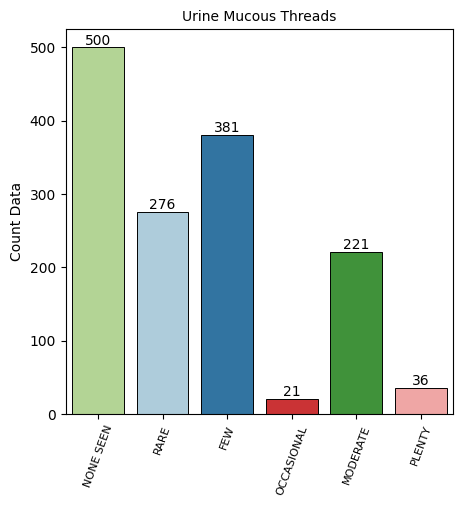

In [ ]:
mucous_order = ['NONE SEEN', 'RARE', 'FEW', 'OCCASIONAL', 'MODERATE', 'PLENTY']

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(urine, x = urine_cat[8],
                   order = mucous_order,
                   palette = 'Paired',
                   hue=urine_cat[8],
                   edgecolor='black',
                   linewidth=0.7)
ax.set_title('Urine Mucous Threads', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Count Data')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=70)
for bars in ax.containers:
  ax.bar_label(bars)

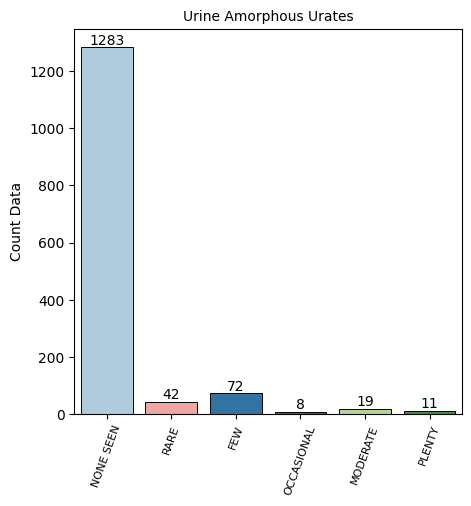

In [ ]:
urate_order = ['NONE SEEN', 'RARE', 'FEW', 'OCCASIONAL', 'MODERATE', 'PLENTY']

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(urine, x = urine_cat[9],
                   palette = 'Paired',
                   order = urate_order,
                   hue=urine_cat[9],
                   edgecolor='black',
                   linewidth=0.7)
ax.set_title('Urine Amorphous Urates', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Count Data')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=70)
for bars in ax.containers:
  ax.bar_label(bars)

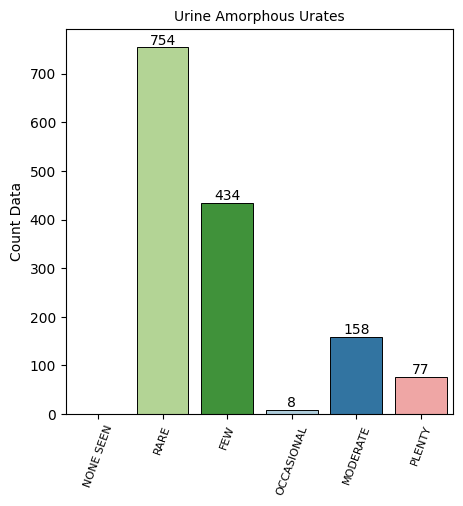

In [ ]:
bacteria_order = ['NONE SEEN', 'RARE', 'FEW', 'OCCASIONAL', 'MODERATE', 'PLENTY']

fig, ax = plt.subplots(figsize=(5,5))
ax = sns.countplot(urine, x = urine_cat[10],
                   order = bacteria_order,
                   palette = 'Paired',
                   hue=urine_cat[10],
                   edgecolor='black',
                   linewidth=0.7)
ax.set_title('Urine Amorphous Urates', fontsize=10)
ax.set_xlabel('')
ax.set_ylabel('Count Data')
ax.tick_params(axis='x', labelsize=8)
plt.xticks(rotation=70)
for bars in ax.containers:
  ax.bar_label(bars)

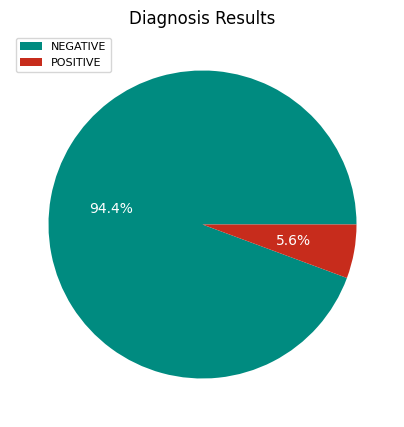

In [ ]:
diag_colors = ['#008B80', '#C72C1C']

urine_pie_data = urine[urine_cat[11]].value_counts()
urine_pie_data.head()

plt.figure(figsize=(5,5))
plt.pie(urine_pie_data, autopct='%1.1f%%', colors=diag_colors, textprops={'color':"white"})
plt.title('Diagnosis Results')
plt.legend(urine_pie_data.index, loc='upper left', fontsize=8)
plt.show()

In [ ]:
urine_corr = urine[urine_num].corr().round(2)
urine_corr.head()

,Age,pH,Specific Gravity
Age,1.00,-0.17,-0.06
pH,-0.17,1.00,-0.40
Specific Gravity,-0.06,-0.40,1.00


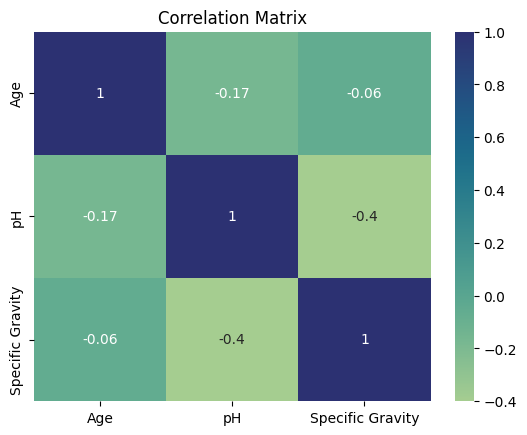

In [ ]:
sns.heatmap(urine_corr, annot = True, cmap='crest')
plt.title('Correlation Matrix')
plt.show()